<a href="https://colab.research.google.com/github/airctic/icedata/blob/master/notebooks/dev/birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and imports

In [2]:
!pip install icevision[all] icedata
!pip install gdown

In [3]:
from icevision.all import *

## Data

!!! warning "Possible error"
    Because the data is stored in google drive, sometimes the download limit exceeds and the automatic download fails. If facing this problem try downloading the data manually from [here](https://drive.google.com/uc?id=1GDr1OkoXdhaXWGA8S3MAq3a522Tak-nx&export=download).

In [4]:
data_dir = icedata.birds.load_data()

In [5]:
class_map = icedata.birds.class_map(data_dir)
parser = icedata.birds.parser(data_dir, class_map)

In [12]:
train_records, valid_records = parser.parse(cache_filepath="birds")

INFO     - Loading cached records from birds | icevision.parsers.parser:parse:113


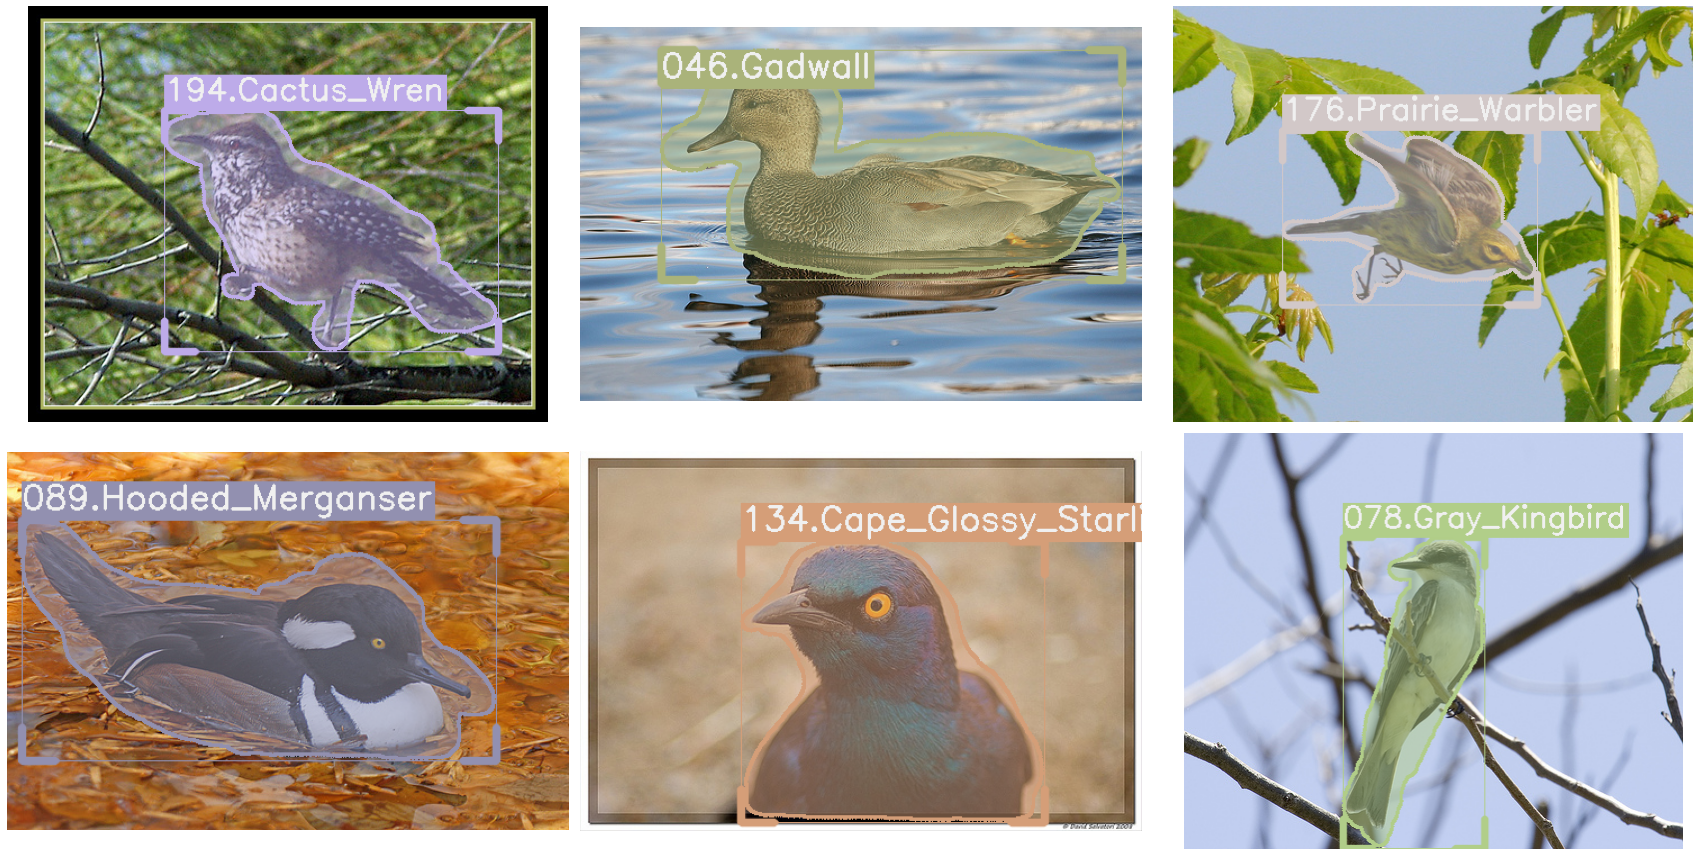

In [7]:
records = random.choices(train_records, k=6)
show_records(records, class_map=class_map, ncols=3)

In [8]:
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=384, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=384), tfms.A.Normalize()])

In [9]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [10]:
train_dl = mask_rcnn.train_dl(train_ds, batch_size=32, num_workers=4, shuffle=True)
valid_dl = mask_rcnn.valid_dl(valid_ds, batch_size=32, num_workers=4, shuffle=False)

## Training

In [11]:
model = mask_rcnn.model(num_classes=len(class_map))

In [12]:
learn = mask_rcnn.fastai.learner(dls=[train_dl, valid_dl], model=model)

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=2.0892961401841603e-05)

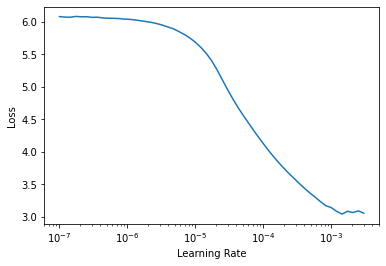

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(10, 2e-4)

epoch,train_loss,valid_loss,time
0,1.131207,0.917218,08:53


epoch,train_loss,valid_loss,time
0,0.767296,0.786138,10:25
1,0.662555,0.666330,09:28
2,0.578390,0.583123,09:30
3,0.537672,0.569911,09:28
4,0.517189,0.544181,09:47
5,0.489110,0.518709,09:55
6,0.464387,0.500264,09:39
7,0.443718,0.484218,09:35
8,0.431858,0.479226,09:33
9,0.427955,0.479175,09:28


In [ ]:
learn.fit_one_cycle(10, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,time
0,0.427481,0.482086,09:34
1,0.435297,0.486503,09:26
2,0.431604,0.472847,09:26
3,0.413561,0.453204,09:23
4,0.397898,0.448937,09:21
5,0.380849,0.435258,09:25
6,0.364369,0.419172,09:23
7,0.352437,0.412515,09:21
8,0.343493,0.410709,09:26
9,0.338009,0.410507,09:25


In [ ]:
learn.fit_one_cycle(10, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,time
0,0.342360,0.415087,09:33
1,0.358526,0.427475,09:28
2,0.363187,0.426951,09:26
3,0.355494,0.417634,09:23
4,0.347343,0.410982,09:23
5,0.331995,0.404832,09:21
6,0.318406,0.394926,09:19
7,0.309775,0.390578,09:17
8,0.298698,0.388045,09:21
9,0.294469,0.387560,09:24


## Results

If you just want to see the results without having to train the model, just uncomment the line below:

In [13]:
# model = icedata.birds.trained_models.mask_rcnn_resnet50_fpn()

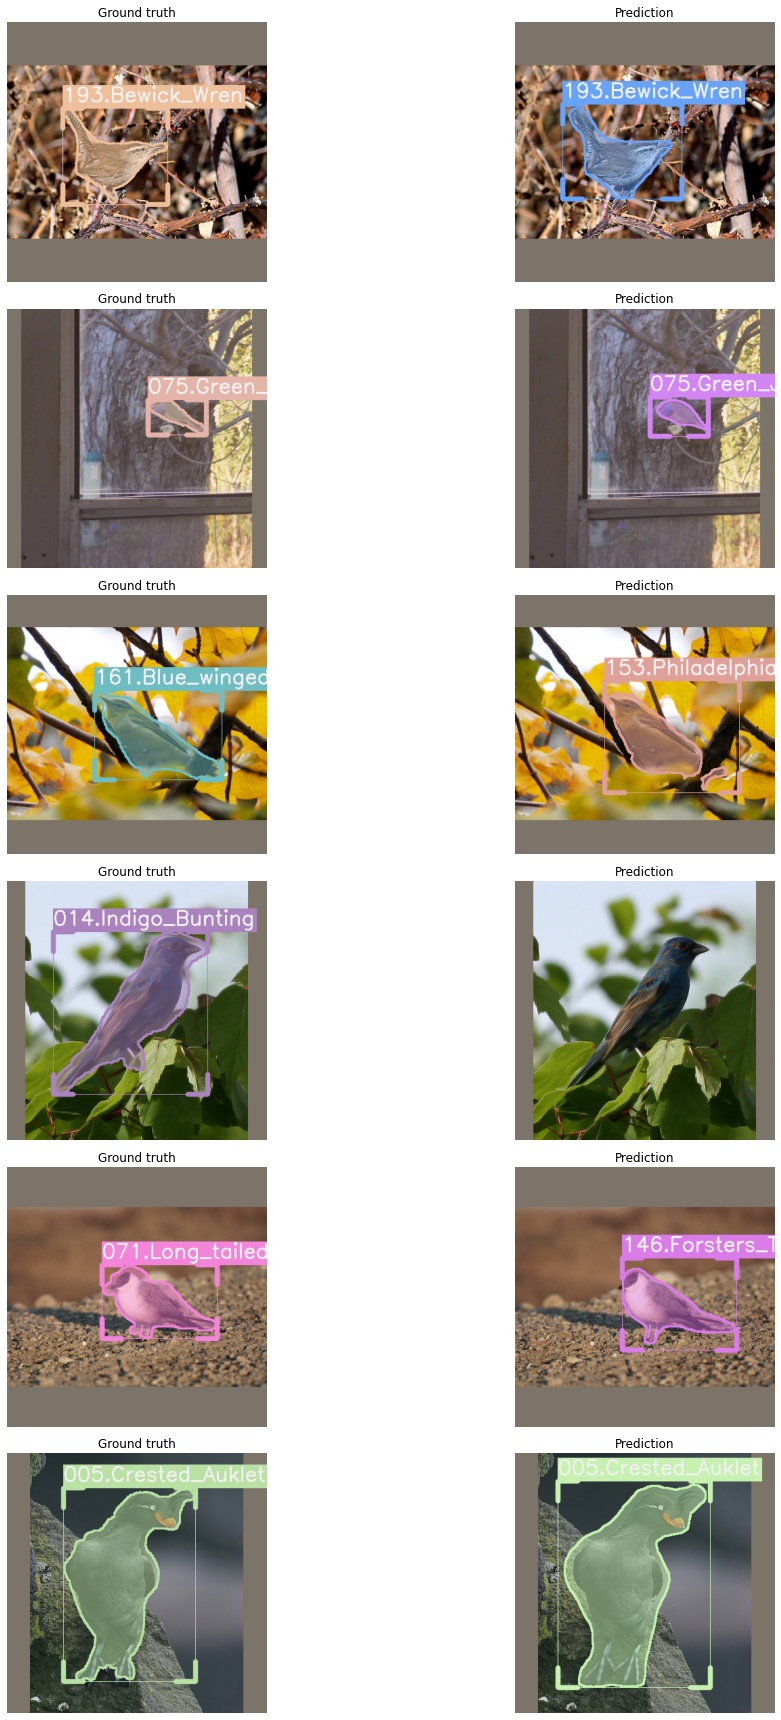

In [14]:
mask_rcnn.show_results(model, valid_ds, class_map=class_map)